In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data from csv file
data=pd.read_csv("DataScience_salaries_2024.csv")
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [3]:
#define the shape of the dataset
data.shape

(14838, 11)

In [4]:
#Choose first 50 observations
data1=data.head(50)

In [5]:
data1.shape

(50, 11)

In [6]:
#describe in numrical data
data1.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,50.000000,5.000000e+01,50.000000,50.000000
mean,2021.920000,4.234456e+06,47576.900000,62.000000
std,1.026983,4.428319e+06,56666.561511,34.345187
min,2020.000000,1.440000e+06,17511.000000,0.000000
25%,2021.000000,2.025000e+06,25159.250000,50.000000
50%,2022.000000,3.000000e+06,36371.000000,50.000000
75%,2023.000000,4.790000e+06,52223.000000,100.000000
max,2024.000000,3.040000e+07,417937.000000,100.000000


In [7]:
#Columns
print(data1.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [8]:
#print the job title column 
print(data1["job_title"])

0                         Data Scientist
1                        BI Data Analyst
2                         Data Scientist
3                            ML Engineer
4         Lead Machine Learning Engineer
5                            ML Engineer
6                   Data Science Manager
7                         Data Scientist
8               Head of Machine Learning
9                      Research Engineer
10                  Head of Data Science
11                         AI Programmer
12             Machine Learning Engineer
13                   Lead Data Scientist
14                         Data Engineer
15                        Data Scientist
16    Applied Machine Learning Scientist
17                        Data Scientist
18                  Data Science Manager
19                  Data Science Manager
20                     Lead Data Analyst
21                  Data Science Manager
22                Data Analytics Manager
23           Data Integration Specialist
24              

In [9]:
#making groups according to the columns
print(data1.groupby('employment_type').groups)

{'FL': [31], 'FT': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [10]:
print(data1.groupby('salary_currency').groups)

{'CLP': [0], 'HUF': [1, 2, 7], 'ILS': [46], 'INR': [4, 6, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49], 'JPY': [3, 5, 9, 14]}


In [11]:
print(data1.groupby('employee_residence').groups)

{'CL': [0], 'HU': [1, 2, 7], 'IL': [46], 'IN': [4, 6, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49], 'JP': [3, 5, 9, 14]}


In [12]:
#count the observations
data1.remote_ratio.value_counts()

remote_ratio
50     24
100    19
0       7
Name: count, dtype: int64

In [13]:
data1.company_location.value_counts()

company_location
IN    35
JP     4
US     3
HU     2
CL     1
ID     1
DE     1
CH     1
IL     1
SG     1
Name: count, dtype: int64

In [14]:
work_year_count=pd.DataFrame(data1['work_year'].value_counts())
work_year_count

,count
work_year,
2021,17
2023,15
2022,13
2020,3
2024,2


In [15]:
#seggregate dataset in each year
print(data1.groupby('work_year').get_group(2020))

    work_year experience_level employment_type       job_title    salary  \
2        2020               MI              FT  Data Scientist  11000000   
14       2020               EN              FT   Data Engineer   4450000   
26       2020               MI              FT  Data Scientist   3000000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
2              HUF          35735                 HU            50   
14             JPY          41689                 JP           100   
26             INR          40481                 IN             0   

   company_location company_size  
2                HU            L  
14               JP            S  
26               IN            L  


In [16]:
print(data1.groupby('work_year').get_group(2021))

    work_year experience_level employment_type                  job_title  \
0        2021               MI              FT             Data Scientist   
1        2021               MI              FT            BI Data Analyst   
3        2021               MI              FT                ML Engineer   
5        2021               MI              FT                ML Engineer   
6        2021               SE              FT       Data Science Manager   
12       2021               SE              FT  Machine Learning Engineer   
17       2021               SE              FT             Data Scientist   
18       2021               SE              FT       Data Science Manager   
25       2021               SE              FT        Lead Data Scientist   
30       2021               MI              FT             Data Scientist   
34       2021               EN              FT              Data Engineer   
35       2021               EN              FT             Data Scientist   

In [17]:
print(data1.groupby('work_year').get_group(2022))

    work_year experience_level employment_type  \
4        2022               SE              FT   
7        2022               EN              FT   
8        2022               EX              FT   
9        2022               EN              FT   
13       2022               SE              FT   
15       2022               MI              FT   
24       2022               SE              FT   
27       2022               MI              FT   
29       2022               MI              FT   
31       2022               MI              FL   
32       2022               MI              FT   
39       2022               EN              FT   
44       2022               MI              FT   

                             job_title   salary salary_currency  \
4       Lead Machine Learning Engineer  7500000             INR   
7                       Data Scientist  6600000             HUF   
8             Head of Machine Learning  6000000             INR   
9                    Research E

In [18]:
print(data1.groupby('work_year').get_group(2023))

    work_year experience_level employment_type  \
10       2023               MI              FT   
11       2023               EN              FT   
16       2023               EN              FT   
19       2023               SE              FT   
21       2023               MI              FT   
22       2023               MI              FT   
23       2023               SE              FT   
28       2023               MI              FT   
37       2023               EN              FT   
38       2023               MI              FT   
41       2023               EN              FT   
42       2023               MI              FT   
46       2023               SE              FT   
47       2023               MI              FT   
49       2023               MI              FT   

                             job_title   salary salary_currency  \
10                Head of Data Science  5000000             INR   
11                       AI Programmer  4950806             INR  

In [19]:
print(data1.groupby('work_year').get_group(2024))

    work_year experience_level employment_type          job_title   salary  \
20       2024               MI              FT  Lead Data Analyst  3300000   
33       2024               MI              FT  Big Data Engineer  2300000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
20             INR          39615                 IN            50   
33             INR          27611                 IN           100   

   company_location company_size  
20               IN            L  
33               IN            L  


In [20]:
#seggregate each job title
print(data1.groupby('job_title').get_group('AI Programmer'))

    work_year experience_level employment_type      job_title   salary  \
11       2023               EN              FT  AI Programmer  4950806   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
11             INR          60207                 IN             0   

   company_location company_size  
11               IN            S  


In [21]:
print(data1.groupby('job_title').get_group('AI Research Engineer'))

    work_year experience_level employment_type             job_title   salary  \
37       2023               EN              FT  AI Research Engineer  2000000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
37             INR          24322                 IN           100   

   company_location company_size  
37               CH            L  


In [22]:
print(data1.groupby('job_title').get_group('AI Scientist'))

    work_year experience_level employment_type     job_title   salary  \
46       2023               SE              FT  AI Scientist  1500000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
46             ILS         417937                 IL             0   

   company_location company_size  
46               IL            L  


In [23]:
print(data1.groupby('job_title').get_group('Applied Data Scientist'))

    work_year experience_level employment_type               job_title  \
42       2023               MI              FT  Applied Data Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
42  1700000             INR          20673                 IN           100   

   company_location company_size  
42               IN            L  


In [24]:
print(data1.groupby('job_title').get_group("Applied Machine Learning Scientist"))

    work_year experience_level employment_type  \
16       2023               EN              FT   
31       2022               MI              FL   

                             job_title   salary salary_currency  \
16  Applied Machine Learning Scientist  4000000             INR   
31  Applied Machine Learning Scientist  2400000             INR   

    salary_in_usd employee_residence  remote_ratio company_location  \
16          48644                 IN           100               DE   
31          30523                 IN           100               IN   

   company_size  
16            L  
31            S  


In [25]:
print(data1.groupby('job_title').get_group('BI Data Analyst'))

   work_year experience_level employment_type        job_title    salary  \
1       2021               MI              FT  BI Data Analyst  11000000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
1             HUF          36259                 HU            50   

  company_location company_size  
1               US            L  


In [26]:
print(data1.groupby('job_title').get_group('Big Data Engineer'))

    work_year experience_level employment_type          job_title   salary  \
33       2024               MI              FT  Big Data Engineer  2300000   
43       2021               MI              FT  Big Data Engineer  1672000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
33             INR          27611                 IN           100   
43             INR          22611                 IN             0   

   company_location company_size  
33               IN            L  
43               IN            L  


In [27]:
print(data1.groupby('job_title').get_group('Data Analyst'))

    work_year experience_level employment_type     job_title   salary  \
41       2023               EN              FT  Data Analyst  1700000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
41             INR          20673                 IN            50   

   company_location company_size  
41               IN            L  


In [28]:
print(data1.groupby('job_title').get_group('Data Analytics Lead'))

    work_year experience_level employment_type            job_title   salary  \
49       2023               MI              FT  Data Analytics Lead  1440000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
49             INR          17511                 IN            50   

   company_location company_size  
49               SG            M  


In [29]:
print(data1.groupby('job_title').get_group('Data Analytics Manager'))

    work_year experience_level employment_type               job_title  \
22       2023               MI              FT  Data Analytics Manager   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
22  3200000             INR          38915                 IN            50   

   company_location company_size  
22               IN            M  


In [30]:
print(data1.groupby('job_title').get_group('Data Engineer'))

    work_year experience_level employment_type      job_title   salary  \
14       2020               EN              FT  Data Engineer  4450000   
27       2022               MI              FT  Data Engineer  2800000   
34       2021               EN              FT  Data Engineer  2250000   
45       2021               EN              FT  Data Engineer  1600000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
14             JPY          41689                 JP           100   
27             INR          35610                 IN            50   
34             INR          30428                 IN           100   
45             INR          21637                 IN            50   

   company_location company_size  
14               JP            S  
27               IN            L  
34               IN            L  
45               IN            M  


In [31]:
print(data1.groupby('job_title').get_group('Data Integration Specialist'))

    work_year experience_level employment_type                    job_title  \
23       2023               SE              FT  Data Integration Specialist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
23  3000000             INR          36483                 IN            50   

   company_location company_size  
23               IN            L  


In [32]:
print(data1.groupby('job_title').get_group('Data Science Manager'))

    work_year experience_level employment_type             job_title   salary  \
6        2021               SE              FT  Data Science Manager  7000000   
18       2021               SE              FT  Data Science Manager  4000000   
19       2023               SE              FT  Data Science Manager  3600000   
21       2023               MI              FT  Data Science Manager  3200000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
6              INR          94665                 IN            50   
18             INR          54094                 IN            50   
19             INR          43779                 IN           100   
21             INR          38915                 IN            50   

   company_location company_size  
6                IN            L  
18               US            L  
19               IN            L  
21               IN            L  


In [33]:
print(data1.groupby('job_title').get_group('Data Scientist'))

    work_year experience_level employment_type       job_title    salary  \
0        2021               MI              FT  Data Scientist  30400000   
2        2020               MI              FT  Data Scientist  11000000   
7        2022               EN              FT  Data Scientist   6600000   
15       2022               MI              FT  Data Scientist   4200000   
17       2021               SE              FT  Data Scientist   4000000   
26       2020               MI              FT  Data Scientist   3000000   
29       2022               MI              FT  Data Scientist   2500000   
30       2021               MI              FT  Data Scientist   2500000   
32       2022               MI              FT  Data Scientist   2400000   
35       2021               EN              FT  Data Scientist   2200000   
36       2021               EN              FT  Data Scientist   2100000   
39       2022               EN              FT  Data Scientist   1800000   

   salary_c

In [34]:
print(data1.groupby('job_title').get_group('Head of Data Science'))

    work_year experience_level employment_type             job_title   salary  \
10       2023               MI              FT  Head of Data Science  5000000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
10             INR          60805                 IN            50   

   company_location company_size  
10               IN            L  


In [35]:
print(data1.groupby('job_title').get_group('Head of Machine Learning'))

   work_year experience_level employment_type                 job_title  \
8       2022               EX              FT  Head of Machine Learning   

    salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
8  6000000             INR          76309                 IN            50   

  company_location company_size  
8               IN            L  


In [36]:
print(data1.groupby('job_title').get_group('Lead Data Analyst'))

    work_year experience_level employment_type          job_title   salary  \
20       2024               MI              FT  Lead Data Analyst  3300000   
47       2023               MI              FT  Lead Data Analyst  1500000   
48       2021               MI              FT  Lead Data Analyst  1450000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
20             INR          39615                 IN            50   
47             INR          18241                 IN            50   
48             INR          19609                 IN           100   

   company_location company_size  
20               IN            L  
47               IN            L  
48               IN            L  


In [37]:
print(data1.groupby('job_title').get_group('Lead Data Scientist'))

    work_year experience_level employment_type            job_title   salary  \
13       2022               SE              FT  Lead Data Scientist  4460000   
25       2021               SE              FT  Lead Data Scientist  3000000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
13             INR          56723                 IN             0   
25             INR          40570                 IN            50   

   company_location company_size  
13               IN            L  
25               IN            L  


In [38]:
print(data1.groupby('job_title').get_group('Lead Machine Learning Engineer'))

   work_year experience_level employment_type                       job_title  \
4       2022               SE              FT  Lead Machine Learning Engineer   

    salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
4  7500000             INR          95386                 IN            50   

  company_location company_size  
4               IN            L  


In [39]:
print(data1.groupby('job_title').get_group('ML Engineer'))

   work_year experience_level employment_type    job_title   salary  \
3       2021               MI              FT  ML Engineer  8500000   
5       2021               MI              FT  ML Engineer  7000000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
3             JPY          77364                 JP            50   
5             JPY          63711                 JP            50   

  company_location company_size  
3               JP            S  
5               JP            S  


In [40]:
print(data1.groupby('job_title').get_group('Machine Learning Engineer'))

    work_year experience_level employment_type                  job_title  \
12       2021               SE              FT  Machine Learning Engineer   
40       2021               SE              FT  Machine Learning Engineer   
44       2022               MI              FT  Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
12  4900000             INR          66265                 IN             0   
40  1799997             INR          24342                 IN           100   
44  1650000             INR          20984                 IN            50   

   company_location company_size  
12               IN            L  
40               IN            L  
44               IN            L  


In [41]:
print(data1.groupby('job_title').get_group('Machine Learning Engineer'))

    work_year experience_level employment_type                  job_title  \
12       2021               SE              FT  Machine Learning Engineer   
40       2021               SE              FT  Machine Learning Engineer   
44       2022               MI              FT  Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
12  4900000             INR          66265                 IN             0   
40  1799997             INR          24342                 IN           100   
44  1650000             INR          20984                 IN            50   

   company_location company_size  
12               IN            L  
40               IN            L  
44               IN            L  


In [42]:
print(data1.groupby('job_title').get_group('NLP Engineer'))

    work_year experience_level employment_type     job_title   salary  \
28       2023               MI              FT  NLP Engineer  2700000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
28             INR          32834                 IN           100   

   company_location company_size  
28               IN            M  


In [43]:
print(data1.groupby('job_title').get_group('Principal Data Architect'))

    work_year experience_level employment_type                 job_title  \
24       2022               SE              FT  Principal Data Architect   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
24  3000000             INR          38154                 IN           100   

   company_location company_size  
24               IN            L  


In [44]:
print(data1.groupby('job_title').get_group('Research Engineer'))

   work_year experience_level employment_type          job_title   salary  \
9       2022               EN              FT  Research Engineer  5500000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
9             JPY          41809                 JP            50   

  company_location company_size  
9               JP            L  


In [45]:
print(data1.groupby('salary').groups)

{1440000: [49], 1450000: [48], 1500000: [46, 47], 1600000: [45], 1650000: [44], 1672000: [43], 1700000: [41, 42], 1799997: [40], 1800000: [39], 2000000: [37, 38], 2100000: [36], 2200000: [35], 2250000: [34], 2300000: [33], 2400000: [31, 32], 2500000: [29, 30], 2700000: [28], 2800000: [27], 3000000: [23, 24, 25, 26], 3200000: [21, 22], 3300000: [20], 3600000: [19], 4000000: [16, 17, 18], 4200000: [15], 4450000: [14], 4460000: [13], 4900000: [12], 4950806: [11], 5000000: [10], 5500000: [9], 6000000: [8], 6600000: [7], 7000000: [5, 6], 7500000: [4], 8500000: [3], 11000000: [1, 2], 30400000: [0]}


In [46]:
#salary is less than 10l
print(data1[data1["salary"]<1000000])

Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [47]:
#salary is greater than 50L
print(data1[data1["salary"]>5000000])

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   
5       2021               MI              FT                     ML Engineer   
6       2021               SE              FT            Data Science Manager   
7       2022               EN              FT                  Data Scientist   
8       2022               EX              FT        Head of Machine Learning   
9       2022               EN              FT               Research Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP  

In [48]:
#sum of salary
print(data1["salary"].sum())

211722803


In [49]:
#mean of salary
print(data1["salary"].mean())

4234456.06


In [50]:
#iterate the data 
import pandas as pd 
for index,row in data1.iterrows(): 
    print(row['work_year'],row['job_title'],'=',row['salary'])

2021 Data Scientist = 30400000
2021 BI Data Analyst = 11000000
2020 Data Scientist = 11000000
2021 ML Engineer = 8500000
2022 Lead Machine Learning Engineer = 7500000
2021 ML Engineer = 7000000
2021 Data Science Manager = 7000000
2022 Data Scientist = 6600000
2022 Head of Machine Learning = 6000000
2022 Research Engineer = 5500000
2023 Head of Data Science = 5000000
2023 AI Programmer = 4950806
2021 Machine Learning Engineer = 4900000
2022 Lead Data Scientist = 4460000
2020 Data Engineer = 4450000
2022 Data Scientist = 4200000
2023 Applied Machine Learning Scientist = 4000000
2021 Data Scientist = 4000000
2021 Data Science Manager = 4000000
2023 Data Science Manager = 3600000
2024 Lead Data Analyst = 3300000
2023 Data Science Manager = 3200000
2023 Data Analytics Manager = 3200000
2023 Data Integration Specialist = 3000000
2022 Principal Data Architect = 3000000
2021 Lead Data Scientist = 3000000
2020 Data Scientist = 3000000
2022 Data Engineer = 2800000
2023 NLP Engineer = 2700000
202

In [51]:
job_title_count=pd.DataFrame(data1['job_title'].value_counts())
job_title_count

,count
job_title,
Data Scientist,12
Data Science Manager,4
Data Engineer,4
Machine Learning Engineer,3
Lead Data Analyst,3
Big Data Engineer,2
Lead Data Scientist,2
Applied Machine Learning Scientist,2
ML Engineer,2


<Axes: xlabel='job_title'>

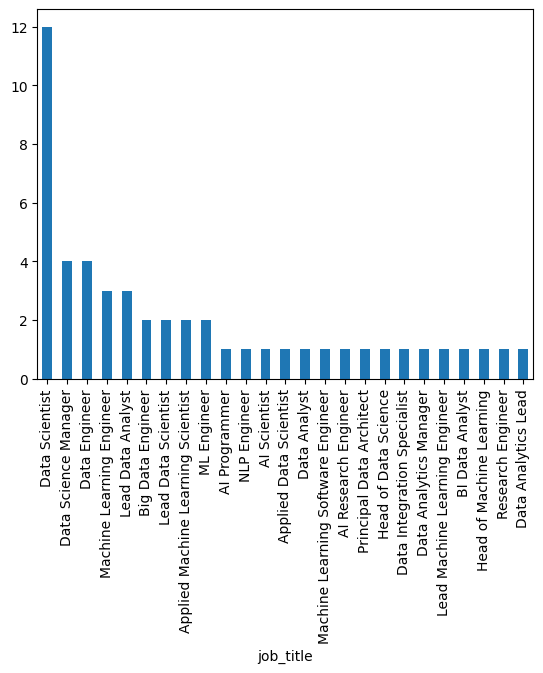

In [50]:
#bar plot 
data1["job_title"].value_counts().head(50).plot(kind="bar")

In [52]:
#data in company_size wise
print(data1.groupby('company_size').get_group('S'))

    work_year experience_level employment_type  \
3        2021               MI              FT   
5        2021               MI              FT   
11       2023               EN              FT   
14       2020               EN              FT   
31       2022               MI              FL   

                             job_title   salary salary_currency  \
3                          ML Engineer  8500000             JPY   
5                          ML Engineer  7000000             JPY   
11                       AI Programmer  4950806             INR   
14                       Data Engineer  4450000             JPY   
31  Applied Machine Learning Scientist  2400000             INR   

    salary_in_usd employee_residence  remote_ratio company_location  \
3           77364                 JP            50               JP   
5           63711                 JP            50               JP   
11          60207                 IN             0               IN   
14          

In [53]:
print(data1.groupby('company_size').get_group('M'))

    work_year experience_level employment_type               job_title  \
7        2022               EN              FT          Data Scientist   
22       2023               MI              FT  Data Analytics Manager   
28       2023               MI              FT            NLP Engineer   
29       2022               MI              FT          Data Scientist   
30       2021               MI              FT          Data Scientist   
36       2021               EN              FT          Data Scientist   
39       2022               EN              FT          Data Scientist   
45       2021               EN              FT           Data Engineer   
49       2023               MI              FT     Data Analytics Lead   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
7   6600000             HUF          17684                 HU           100   
22  3200000             INR          38915                 IN            50   
28  2700000           

In [54]:
print(data1.groupby('company_size').get_group('L'))

    work_year experience_level employment_type  \
0        2021               MI              FT   
1        2021               MI              FT   
2        2020               MI              FT   
4        2022               SE              FT   
6        2021               SE              FT   
8        2022               EX              FT   
9        2022               EN              FT   
10       2023               MI              FT   
12       2021               SE              FT   
13       2022               SE              FT   
15       2022               MI              FT   
16       2023               EN              FT   
17       2021               SE              FT   
18       2021               SE              FT   
19       2023               SE              FT   
20       2024               MI              FT   
21       2023               MI              FT   
23       2023               SE              FT   
24       2022               SE              FT   


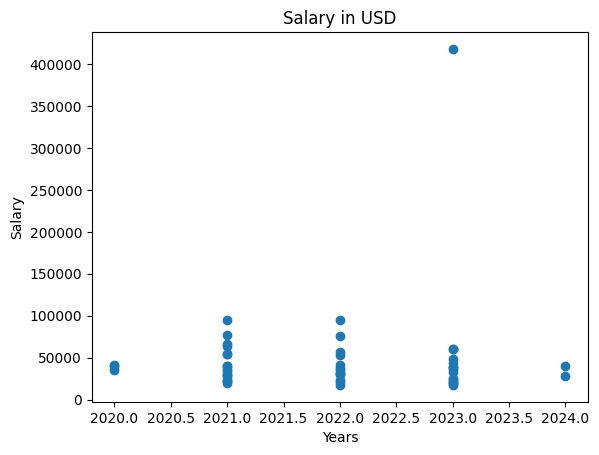

In [55]:
#scatter plot
plt.scatter(data1.work_year,data1.salary_in_usd)
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary in USD")
plt.show()

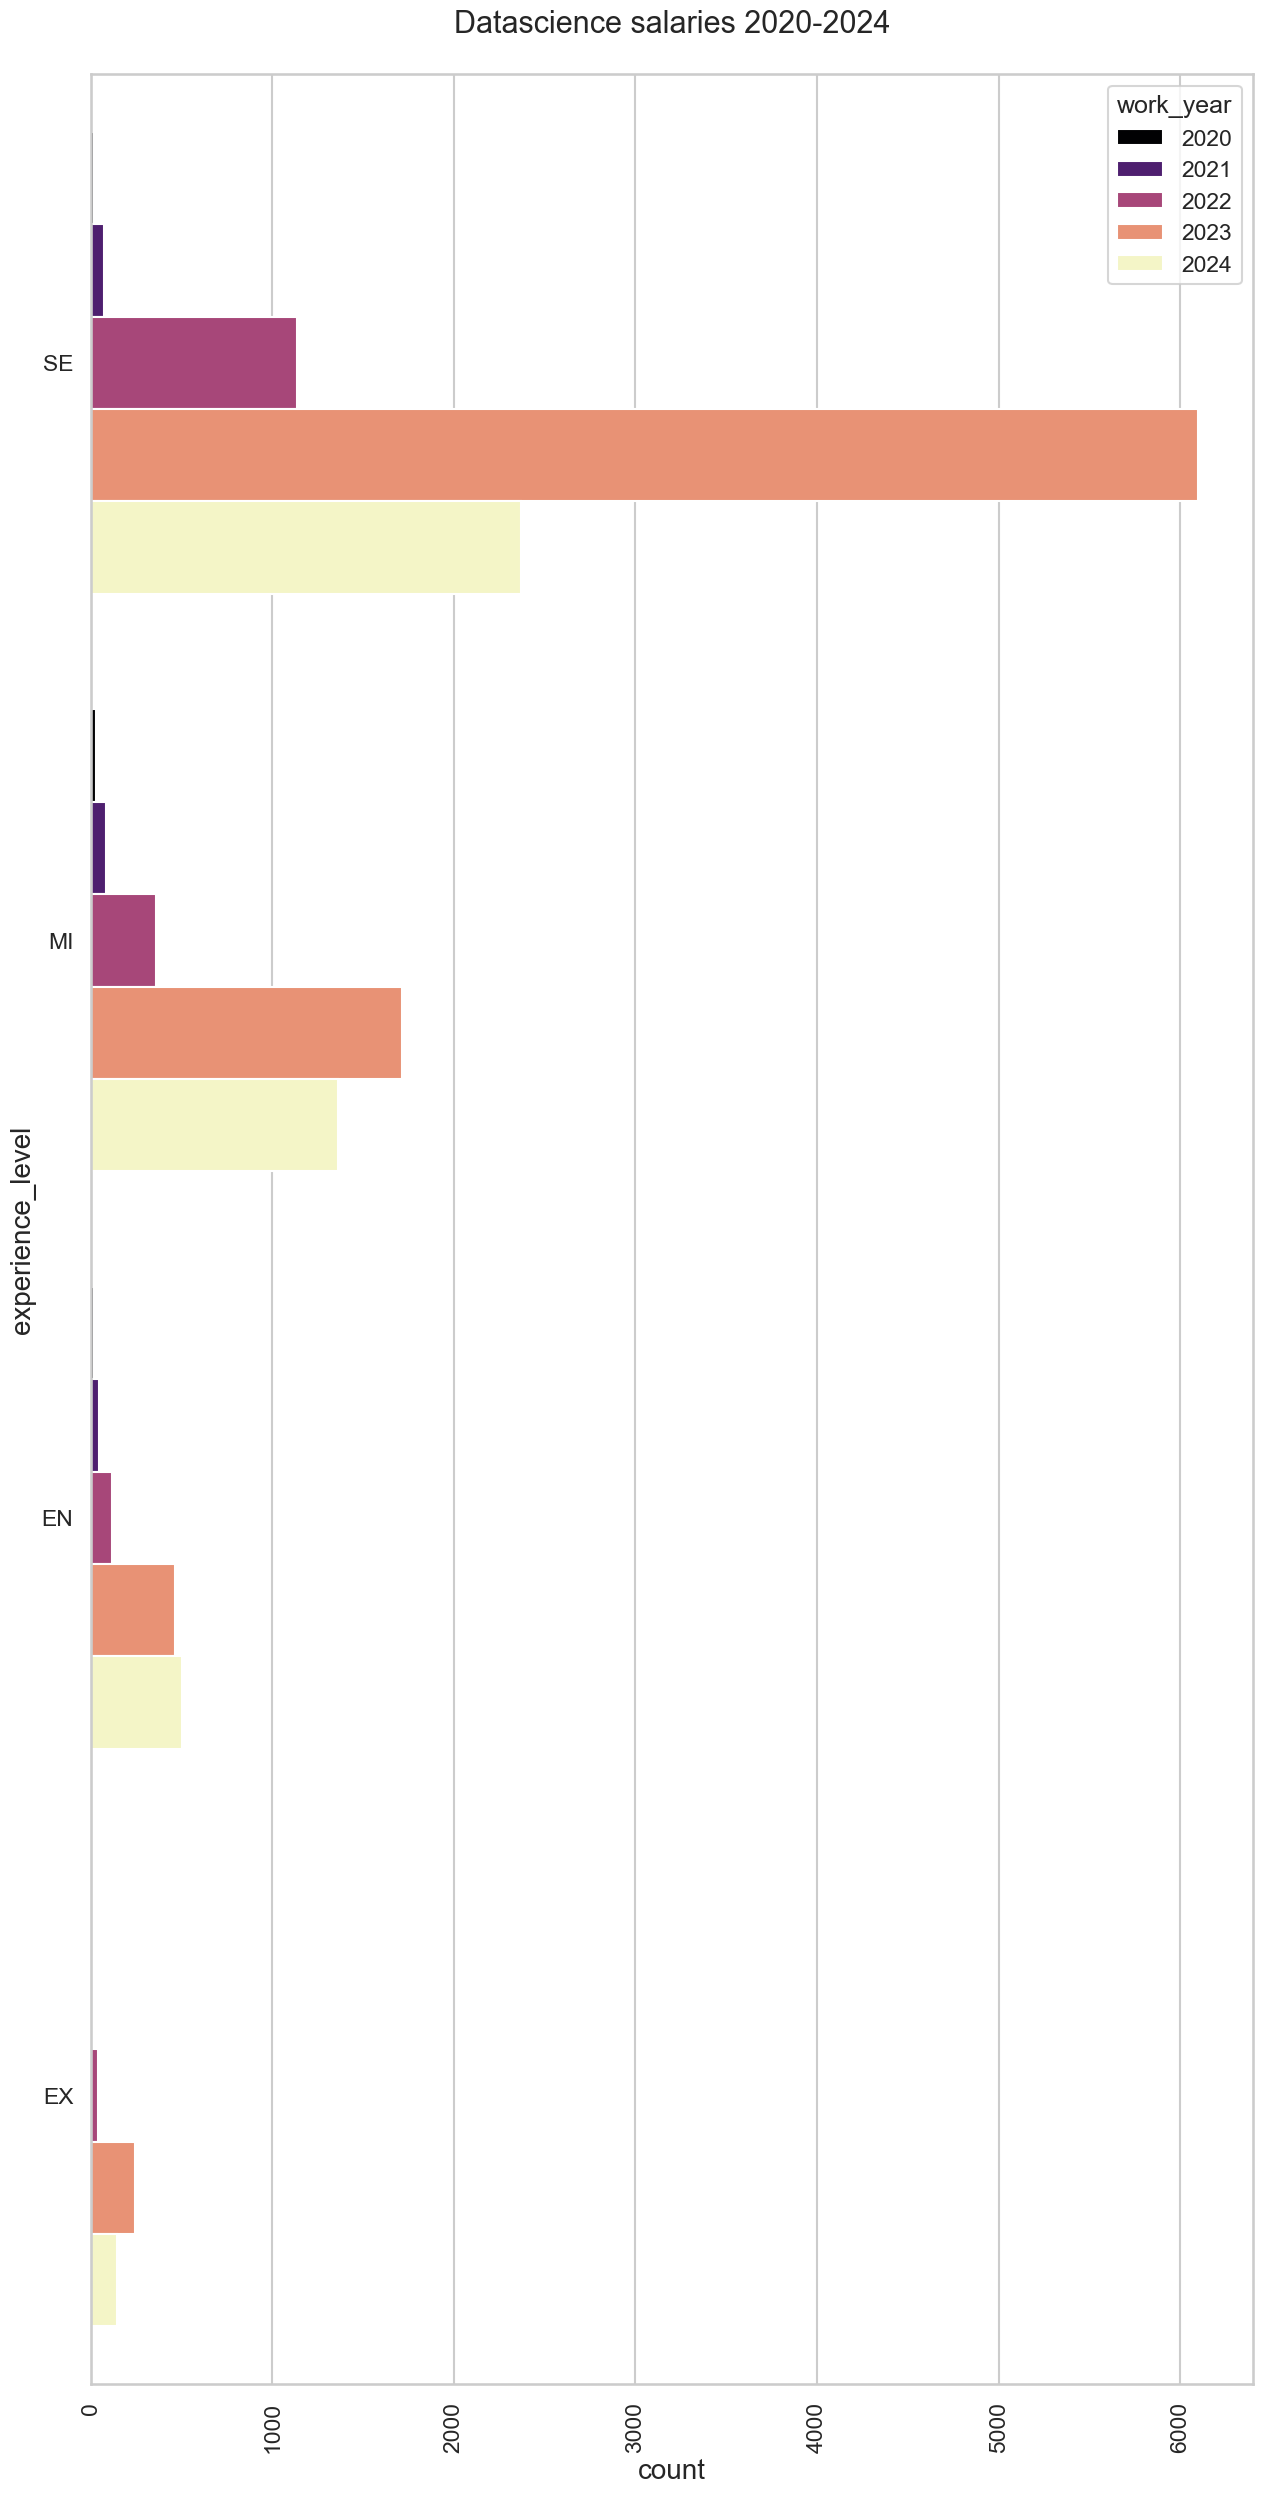

In [56]:
#searborn
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.title('Datascience salaries 2020-2024')
ax = sns.countplot(data = data, y= 'experience_level', 
                   order=data['experience_level'].value_counts().index,hue = 'work_year',palette='magma')

<Axes: xlabel='job_title', ylabel='work_year'>

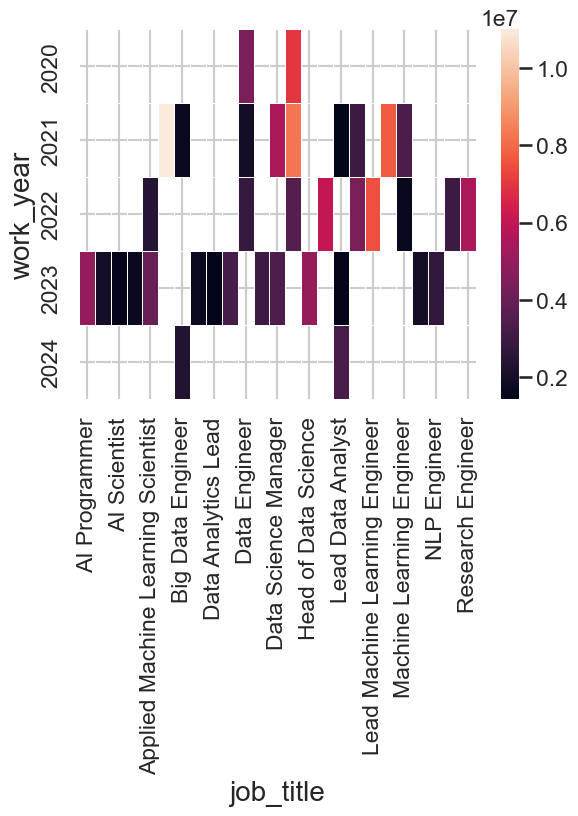

In [57]:
#heatmap
map1=data1.pivot_table(index="work_year",columns="job_title",values="salary")
sns.heatmap(map1,linewidths=0.5)